**Please fill these in before submitting, just in case I accidentally mix up file names while grading**:

Name: Kenneth Bilicke

CWID-5: 37189

# Assignment 01 - Python, NumPy, Matplotlib and Pandas
----------------------------

**Due: Fri 09/06/2024**


In [1]:
# the following are all of the imports you probably need to complete this assignment
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# the following function magic allows us to execute doctest tests in the notebook
# inside the notebook
import doctest
import copy
def test(func):
    globs = copy.copy(globals())
    globs.update({func.__name__:func})
    doctest.run_docstring_examples(func, globs, verbose=True, name=func.__name__)
    return func

## Problem 1: Python Functions, Recursion and Memoization
----

Memoization is a technique that uses a dictionary to cache computed results.
Mamoization can result in significant speed improvements for some recursive and other
types of algorithms that need a subcalculation repeated many times.

For example, an inefficient implementation of calculating the $n^{th}$
[Fibonacci number](https://en.wikipedia.org/wiki/Fibonacci_number)
might look like the following.  Do you understand why this implementation
is inefficient? It performs many redundant recursive calls, try creating a tree of
the calls for `fib(5)` that are done.  These redundant calculations quickly
(exponentially) explode the amount of work that is performed by this naive 
implementation.

In [3]:
def fibonacci_inefficient(n):
    """Calculate the nth Fibonacci number of the Fibonacci sequence using
    recursion.  The base cases of the sequence are defined as:
    
    fib(1) = 1
    fib(2) = 2
    
    And the recursive case is that
    
    fib(n) = fib(n - 1) + fib(n - 2)
    
    Paramters
    ---------
    n - We are to calculate the nth number of the Fibonacci sequence and return it.
    
    Returns
    -------
    fib(n) - Returns the calculated nth Fibonacci number of the Fibonacci sequence.

    Tests
    -----
    # base cases
    >>> fibonacci_inefficient(1)
    1
    >>> fibonacci_inefficient(2)
    2

    # 3 and 4 require recursive cases
    >>> fibonacci_inefficient(3)
    3
    >>> fibonacci_inefficient(4)
    5

    # some more complex, and inefficient cases
    >>> fibonacci_inefficient(10)
    89
    >>> fibonacci_inefficient(37)
    39088169

    """
    if n == 1:
        return 1
    elif n == 2:
        return 2
    else:
        return fibonacci_inefficient(n - 1) + fibonacci_inefficient(n - 2)

# run all defined doc tests given in the function documentation
test(fibonacci_inefficient)

Finding tests in fibonacci_inefficient
Trying:
    fibonacci_inefficient(1)
Expecting:
    1
ok
Trying:
    fibonacci_inefficient(2)
Expecting:
    2
ok
Trying:
    fibonacci_inefficient(3)
Expecting:
    3
ok
Trying:
    fibonacci_inefficient(4)
Expecting:
    5
ok
Trying:
    fibonacci_inefficient(10)
Expecting:
    89
ok
Trying:
    fibonacci_inefficient(37)
Expecting:
    39088169
ok


<function __main__.fibonacci_inefficient(n)>

In [4]:
# notice the time it takes because of all of the repeated, inefficient work
# I normally see over 10 seconds on average to calculate the 37th Fibonacci
# number, uncomment this to see how long it takes on your system, but might want to
# comment it out again when working on rest of assignment and before submitting your work
%timeit fibonacci_inefficient(37)

2.23 s ± 18.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Write an efficient version of calculating the $n^{th}$ Fibonacci number using
the memoization technique.  Your function should take 2 parameters, `n`
the Fibonacci number to calculate, and `d` a dictionary.  You should use
a default value for your dictionary, and initialize it for the base
cases of `fibonacci_efficient(1) = 1` and `fibonacci_efficient(2) = 2`.
The signature of the function you should write should look like this:

```python
def fibonacci_efficient(n, d = {1:1, 2:2}):
    """Calculate the nth Fibonacci number of the Fibonacci sequence using
    recursion and memoization.  The base cases of the sequence are
    defined as:
    
    fib(1) = 1
    fib(2) = 2
    
    And the recursive case is that
    
    fib(n) = fib(n - 1) + fib(n - 2)

    But this version should use memoization instead of the inefficient double
    recursion, so it should be much faster than the given inefficient version.
    
    Paramters
    ---------
    n - We are to calculate the nth number of the Fibonacci sequence and
        return it.
    d - A dictionary of cached previously computed results.  By default, the
        base cases of fib(1) = 1 and fib(2) = 2 are initialized for the
        dictionary, so that the first call to this function can be simply
        done as:
             fibonacci_efficient(10)
             
    Returns
    -------
    fib(n) - Returns the calculated nth Fibonacci number of the 
        Fibonacci sequence.
        
    Tests
    -----
    # base cases
    >>> fibonacci_inefficient(1)
    1
    >>> fibonacci_inefficient(2)
    2

    # 3 and 4 require recursive cases
    >>> fibonacci_inefficient(3)
    3
    >>> fibonacci_inefficient(4)
    5

    # some more complex, and inefficient cases
    >>> fibonacci_inefficient(10)
    89
    >>> fibonacci_inefficient(37)
    39088169

    """
```


Wrte your implementation and demonstrate the time of your implementation to calculate
the $37^{th}$ Fibonacci number as we did above.  If you implement the memoization
correctly, you will find that your function only takes 100s of nano seconds, 
which is almost billion times speed improvement.

In [5]:
fib_dict = {1:1, 2:2}
def fibonacci_efficient(n, fib_dict = fib_dict):
    """Calculate the nth Fibonacci number of the Fibonacci sequence using
    recursion and memoization.  The base cases of the sequence are
    defined as:

    fib(1) = 1
    fib(2) = 2

    And the recursive case is that

    fib(n) = fib(n - 1) + fib(n - 2)

    But this version should use memoization instead of the inefficient double
    recursion, so it should be much faster than the given inefficient version.

    Paramters
    ---------
    n - We are to calculate the nth number of the Fibonacci sequence and
        return it.
    fib_dict - An external dictionary of cached previously computed results.  By default, the
        base cases of fib(1) = 1 and fib(2) = 2 are initialized for the
        dictionary, so that the first call to this function can be simply
        done as:
             fibonacci_efficient(10)

    Returns
    -------
    fib(n) - Returns the calculated nth Fibonacci number of the 
        Fibonacci sequence.

    Tests
    -----
    # base cases
    >>> fibonacci_efficient(1)
    1
    >>> fibonacci_efficient(2)
    2

    # 3 and 4 require recursive cases
    >>> fibonacci_efficient(3)
    3
    >>> fibonacci_efficient(4)
    5

    # some more complex, and inefficient cases
    >>> fibonacci_efficient(10)
    89
    >>> fibonacci_efficient(37)
    39088169

    """
    if n in fib_dict:
        return fib_dict[n]
    else:
        fib_dict[n] = fibonacci_efficient(n-1, fib_dict) + fibonacci_efficient(n-2, fib_dict)
        return fib_dict[n]
    
test(fibonacci_efficient)

Finding tests in fibonacci_efficient
Trying:
    fibonacci_efficient(1)
Expecting:
    1
ok
Trying:
    fibonacci_efficient(2)
Expecting:
    2
ok
Trying:
    fibonacci_efficient(3)
Expecting:
    3
ok
Trying:
    fibonacci_efficient(4)
Expecting:
    5
ok
Trying:
    fibonacci_efficient(10)
Expecting:
    89
ok
Trying:
    fibonacci_efficient(37)
Expecting:
    39088169
ok


<function __main__.fibonacci_efficient(n, fib_dict={1: 1, 2: 2, 3: 3, 4: 5, 5: 8, 6: 13, 7: 21, 8: 34, 9: 55, 10: 89, 11: 144, 12: 233, 13: 377, 14: 610, 15: 987, 16: 1597, 17: 2584, 18: 4181, 19: 6765, 20: 10946, 21: 17711, 22: 28657, 23: 46368, 24: 75025, 25: 121393, 26: 196418, 27: 317811, 28: 514229, 29: 832040, 30: 1346269, 31: 2178309, 32: 3524578, 33: 5702887, 34: 9227465, 35: 14930352, 36: 24157817, 37: 39088169})>

In [6]:
# your time should be only 100's of ns now, where 1ns = 1e9 sec, so almost billions of
# times faster than before
%timeit fibonacci_efficient(37)

85.8 ns ± 1.02 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


## Problem 2: NumPy Operations
----



Create the specified NumPy arrays using NumPy library and/or vectorized operations (do not use any
loops in your following answers).

Create an array named `x` with 5 values linearly spaced from -2.0 to 2.0.  Reshape x to be a row
matrix with 1 row and 5 columns.  Your result should look like this:

```python
>>> print(x)
[[-2. -1.  0.  1.  2.]]
```

In [7]:
# your code to create x here, make sure it has the correct shape
x = np.linspace(-2, 2, 5).reshape(1,5)
print(x)

[[-2. -1.  0.  1.  2.]]


Create an array named `y` with 4 values linearly spaces from -1 to 1.  Reshape y to be
a column matrix with 1 column and 4 rows.  `y` should look like this when done:

```python
>>> print(y)
[[-1.        ]
 [-0.33333333]
 [ 0.33333333]
 [ 1.        ]]
```

In [8]:
# your code to create y goes here, make sure it has the correct shape
y = np.linspace(-1, 1, 4).reshape(4,1)
print(y)

[[-1.        ]
 [-0.33333333]
 [ 0.33333333]
 [ 1.        ]]


The `np.tile()` function can be used to repeat parts of an array.  For example, we can turn
`x` into a 4 rows by 5 columns matrix, repeating its row, like this:

In [9]:
# uncomment the following if your variable lower case x is correctly working, notice it creates a new
# upper case X variable here
X = np.tile(x, (4,1))
print(X)
print(X.shape)

[[-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]]
(4, 5)


In the next cell demonstrate tiling the `y` column array to also be of shape `(4,5)`, but where each
column is a repeatition of the current single column in `y`.

In [10]:
# tile y's column to end up with 5 repeated columns of y, and a shape again of (4,5)
Y = np.tile(y, (1,5))
print(Y)
print(Y.shape)

[[-1.         -1.         -1.         -1.         -1.        ]
 [-0.33333333 -0.33333333 -0.33333333 -0.33333333 -0.33333333]
 [ 0.33333333  0.33333333  0.33333333  0.33333333  0.33333333]
 [ 1.          1.          1.          1.          1.        ]]
(4, 5)


Now demonstrate the result of doing a vectorized multiplication of the tiled result of `y` times
the complex number 0 + 1j.  The result should look like this.  Notice that the original contents
of `y` are multiplied times both the real and complex part, but since the real part is 0 you end up
only with the complex part.

```python
>>> print(Y)
array([[-0.-1.j        , -0.-1.j        , -0.-1.j        ,
        -0.-1.j        , -0.-1.j        ],
       [-0.-0.33333333j, -0.-0.33333333j, -0.-0.33333333j,
        -0.-0.33333333j, -0.-0.33333333j],
       [ 0.+0.33333333j,  0.+0.33333333j,  0.+0.33333333j,
         0.+0.33333333j,  0.+0.33333333j],
       [ 0.+1.j        ,  0.+1.j        ,  0.+1.j        ,
         0.+1.j        ,  0.+1.j        ]])

>>> print(Y.shape)
(4, 5)
```

In [11]:
# demonstrate vectorized multiplication and save result back into uppercase Y here
Y = Y * (0+1j)
print(Y)
print(Y.shape)

[[-0.-1.j         -0.-1.j         -0.-1.j         -0.-1.j
  -0.-1.j        ]
 [-0.-0.33333333j -0.-0.33333333j -0.-0.33333333j -0.-0.33333333j
  -0.-0.33333333j]
 [ 0.+0.33333333j  0.+0.33333333j  0.+0.33333333j  0.+0.33333333j
   0.+0.33333333j]
 [ 0.+1.j          0.+1.j          0.+1.j          0.+1.j
   0.+1.j        ]]
(4, 5)


Using the previous 2 tile commands and vectorized multiplication, create a new matrix Z that is
of shape `(5,4)`.  Z is the result of adding up the tiled of `x` and `y * 1j`.

You should get the following result.  Notice that `Z` the real part is the part from the tiled `x`
and the imaginary part comes from the tiled `y`:

```python
>>> print(Z)
[[-2.-1.j         -1.-1.j          0.-1.j          1.-1.j
   2.-1.j        ]
 [-2.-0.33333333j -1.-0.33333333j  0.-0.33333333j  1.-0.33333333j
   2.-0.33333333j]
 [-2.+0.33333333j -1.+0.33333333j  0.+0.33333333j  1.+0.33333333j
   2.+0.33333333j]
 [-2.+1.j         -1.+1.j          0.+1.j          1.+1.j
   2.+1.j        ]]
>>> print(Z.shape)
(4, 5)
```

In [12]:
# create your Z using vectorized addition
Z = X + Y
print(Z)
print(Z.shape)

[[-2.-1.j         -1.-1.j          0.-1.j          1.-1.j
   2.-1.j        ]
 [-2.-0.33333333j -1.-0.33333333j  0.-0.33333333j  1.-0.33333333j
   2.-0.33333333j]
 [-2.+0.33333333j -1.+0.33333333j  0.+0.33333333j  1.+0.33333333j
   2.+0.33333333j]
 [-2.+1.j         -1.+1.j          0.+1.j          1.+1.j
   2.+1.j        ]]
(4, 5)


In the next cell, create an array called `T` which will be used to record time stamps later on.
`T` should be the same shape as Z `(4, 5)` but filled all with 0's.

In [13]:
# Create an array called N of the same shape as Z of all zeros
T = np.zeros(Z.shape)
print(T)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


Now create an array named `M` which will be used as a mask later on.  `M` should be the same shape
as `Z`, but its values should be of `dtype=bool` and all of the boolean values should initially
be set to `True`.  You should get the following results for this array named `M`:

```python
>>> print(M)
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]

>>> print(M.shape)
(4, 5)

>>> print(M.dtype)
bool
```

In [14]:
# create an array called M of the same size as Z but using dtype=bool and initially all values
# are set to True
M = np.array([True]*Z.size,dtype=bool).reshape(Z.shape)
print(M)
print(M.shape)
print(M.dtype)

[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
(4, 5)
bool


Now create an array called `C` of complex values.  `C` should be the same shape as `Z` and it should
be filled with the complex value `-0.4 + 0.6j` for all elements.

```python
>>> print(C)
[[-0.4+0.6j -0.4+0.6j -0.4+0.6j -0.4+0.6j -0.4+0.6j]
 [-0.4+0.6j -0.4+0.6j -0.4+0.6j -0.4+0.6j -0.4+0.6j]
 [-0.4+0.6j -0.4+0.6j -0.4+0.6j -0.4+0.6j -0.4+0.6j]
 [-0.4+0.6j -0.4+0.6j -0.4+0.6j -0.4+0.6j -0.4+0.6j]]

>>> print(C.shape)
(4, 5)

>>> print(C.dtype)
complex128
```

In [15]:
# create an array called C of the same shape as Z, but all filled with the complex value
# -0.4 + 0.6j
C = np.array([-0.4 + 0.6j]*Z.size).reshape(Z.shape)
print(C)
print(C.shape)
print(C.dtype)

[[-0.4+0.6j -0.4+0.6j -0.4+0.6j -0.4+0.6j -0.4+0.6j]
 [-0.4+0.6j -0.4+0.6j -0.4+0.6j -0.4+0.6j -0.4+0.6j]
 [-0.4+0.6j -0.4+0.6j -0.4+0.6j -0.4+0.6j -0.4+0.6j]
 [-0.4+0.6j -0.4+0.6j -0.4+0.6j -0.4+0.6j -0.4+0.6j]]
(4, 5)
complex128


The `np.abs()` function is a vectorized NumPy function that will compute the absolute value of an
array of values.  However, the 
[absolute value of a complex number](https://en.wikipedia.org/wiki/Absolute_value#Complex_numbers)
is defined asa function of the real and imaginary parts.  For example, try finding the
absolute value of your `Z` matrix, you should get the following result:

```python
>>> np.abs(Z)
array([[2.23606798, 1.41421356, 1.        , 1.41421356, 2.23606798],
       [2.02758751, 1.05409255, 0.33333333, 1.05409255, 2.02758751],
       [2.02758751, 1.05409255, 0.33333333, 1.05409255, 2.02758751],
       [2.23606798, 1.41421356, 1.        , 1.41421356, 2.23606798]])
```

In [16]:
# calculate the absolute value of Z here
np.abs(Z)

array([[2.23606798, 1.41421356, 1.        , 1.41421356, 2.23606798],
       [2.02758751, 1.05409255, 0.33333333, 1.05409255, 2.02758751],
       [2.02758751, 1.05409255, 0.33333333, 1.05409255, 2.02758751],
       [2.23606798, 1.41421356, 1.        , 1.41421356, 2.23606798]])

Perform the following vectorized calculations in this order.

1. Create a mask array named `M` that is the same shape as `Z` and is `False` at all locations
where the absolute value of `Z` is greater than 2.
2. Update `T` to be 1 for all places where the mask `M` is true
3. Update `Z` but only for the values where the mask `M` is true. Update it using the following 
quadratic formula
$$
Z = Z^2 + C
$$
This is a vectorized operation, but again only perform this update of `Z` for those values where the
mask `M` is true (**HINT**: using boolean indexing).

The result will be `(4,5)` shaped matrices in all cases, and you should get the following for
`M`, `T` and `Z` if you perform the vectorized operations correctly:

```python
>>> print(M)
[[False  True  True  True False]
 [False  True  True  True False]
 [False  True  True  True False]
 [False  True  True  True False]]

>>> print(T)
[[0. 1. 1. 1. 0.]
 [0. 1. 1. 1. 0.]
 [0. 1. 1. 1. 0.]
 [0. 1. 1. 1. 0.]]

>>> print(Z)
[[-2.        -1.j         -0.4       +2.6j        -1.4       +0.6j
  -0.4       -1.4j         2.        -1.j        ]
 [-2.        -0.33333333j  0.48888889+1.26666667j -0.51111111+0.6j
   0.48888889-0.06666667j  2.        -0.33333333j]
 [-2.        +0.33333333j  0.48888889-0.06666667j -0.51111111+0.6j
   0.48888889+1.26666667j  2.        +0.33333333j]
 [-2.        +1.j         -0.4       -1.4j        -1.4       +0.6j
  -0.4       +2.6j         2.        +1.j        ]]

```


In [17]:
# if you print M here should get same as shown
M = abs(Z) <= 2
print(M)

[[False  True  True  True False]
 [False  True  True  True False]
 [False  True  True  True False]
 [False  True  True  True False]]


In [18]:
# if you display T here should get same result shown
T[ (M) ] = 1
print(T)

[[0. 1. 1. 1. 0.]
 [0. 1. 1. 1. 0.]
 [0. 1. 1. 1. 0.]
 [0. 1. 1. 1. 0.]]


In [19]:
# using M as a mask, computer Z**2 + C and put the value back into Z
Z[ (M) ] = (Z[(M)] * Z[(M)]) + C[(M)]
print(Z)

[[-2.        -1.j         -0.4       +2.6j        -1.4       +0.6j
  -0.4       -1.4j         2.        -1.j        ]
 [-2.        -0.33333333j  0.48888889+1.26666667j -0.51111111+0.6j
   0.48888889-0.06666667j  2.        -0.33333333j]
 [-2.        +0.33333333j  0.48888889-0.06666667j -0.51111111+0.6j
   0.48888889+1.26666667j  2.        +0.33333333j]
 [-2.        +1.j         -0.4       -1.4j        -1.4       +0.6j
  -0.4       +2.6j         2.        +1.j        ]]


## Problem 3: Vectorized Functions and Plotting
----

Using the operations to create and update `Z` in the previous problem, we will now write a function
that will perform the update on `Z`, `T`, and `M` repeatedly.  The formula to update `Z` we just
did is the quadratic polynomial used to calculate *Julia Sets*.  Given a matrix of complex numbers,
if you successively iterate the updates of `Z` you will get this set.

Create a function named `iterate_julia_set`.  This function will have the following signature:

```python
def iterate_julia_set(Z, num_iters=256, c=-0.4+0.6j):
    """Iterate the array of complex numbers Z a number of times, updating them using the 
    quadratic polynomial to calculate the Julia set and Julia fractals.
    
    Parameters
    ----------
    Z - A 2d NumPy array of complex numbers.  Should be a tiled grid of real+complex parts 
        linearly spaces over some area we want to calculate the julia set for.
    c - A complex number, the constant to be added to each value on each iteration for numbers
        still in the julia set.  Defaults to c=-0.4+0.6j
    num_iters - Number of iterations/updates to perform of the Z, M and T matrices.
        Defaults to performing 256 iterations
        
    Returns
    -------
    T - Returns a NumPy array of the same shape as the input Z. T contains the time step/stamp
        of when each point in Z fell out of the julia set during iterations.
    """

```

Your function should do the following.

1. Make a copy of the `Z` array that is passed in, so that if we update it the updates are not seen
outside of the function.
2. Initialize `C`, `M` and `T` based on the shape of `Z`, as you did for the previous question.  `T` is 
an array of time stamps, that are all initially 0.  `C` is simply an array of complex numbers, you
should use the parameter `c` as the initial value for all values in `C`.  And `M` is a boolean
mask that keeps track of which points in `Z` have an absolute value above or below the threshold
of 2.
3. Then create a loop that iterats the indicated `num_iters` times.  Insice of your loop 
you should perform the 3 updates we did previously.  `Z` is updated as `Z^2 + c` but only for
the values where the mask `M` is true.  Then the mask `M` is updated since the values of
`Z` have now changed.  And finally, mark any values in `T` using the mask with the current
timestamp, only for those locations where the mask `M` is `True`.

At the end you should return the resulting time stamps array `T` as the result from your
function.

Write your implementation of the function in the next cell.  Don't forget to include the function
doc string documentation, which you should have for all functions you write for all assignments for this
class.

In [20]:
def iterate_julia_set(Z, c=-0.4+0.6j, num_iters=256):
    """Iterate the array of complex numbers Z a number of times, updating them using the 
    quadratic polynomial to calculate the Julia set and Julia fractals.
    
    Parameters
    ----------
    Z - A 2d NumPy array of complex numbers.  Should be a tiled grid of real+complex parts 
        linearly spaces over some area we want to calculate the julia set for.
    c - A complex number, the constant to be added to each value on each iteration for numbers
        still in the julia set.  Defaults to c=-0.4+0.6j
    num_iters - Number of iterations/updates to perform of the Z, M and T matrices.  Defaults to
        performing 256 iterations
        
    Returns
    -------
    T - Returns a NumPy array of the same shape as the input Z. T contains the time step/stamp
        of when each point in Z fell out of the julia set during iterations.
    """
    temp_Z = np.copy(Z)
    T = np.zeros(Z.shape)
    C = np.array([-0.4 + 0.6j]*Z.size).reshape(Z.shape)
    M = abs(Z) <= 2
    for i in range(1, num_iters + 1):
        temp_Z[ (M) ] = (temp_Z[(M)] * temp_Z[(M)]) + C[(M)]
        M = abs(temp_Z) <= 2
        T[ (M) ] = i

    return T

If you implement your function correctly, then the result of running the following 3
cells should be a figure/image plot of the julia fractal set.  If your implementation is correct,
then the figure will look like the image shown here, using a default of `c=-0.4+0.6j` for the
complex number constant and 256 iterations in total.

![title](../figures/assg-01-problem-03-result.png)

In [21]:
# dimensions grid points we will generate for our Z matrix of complex numbers to iterate
# (actually 1/2 the dimensions, since we go from -cols to +cols and -rows to +rows)
cols = 480
rows = 320

# figure scale
scale = 300

# create Z matrix of points, we start simply with a set of linearly
# spaced points representating the range and grid for the x and y axis.
# Then we can use the tile() funciton to create a grid
x = np.linspace(-cols / scale, cols / scale, num=cols).reshape(1, cols)
y = np.linspace(-rows / scale, rows / scale, num=rows).reshape(rows, 1)
Z = np.tile(x, (rows, 1)) + 1j * np.tile(y, (1, cols))

In [22]:
Z

array([[-1.6       -1.06666667j, -1.59331942-1.06666667j,
        -1.58663883-1.06666667j, ...,  1.58663883-1.06666667j,
         1.59331942-1.06666667j,  1.6       -1.06666667j],
       [-1.6       -1.0599791j , -1.59331942-1.0599791j ,
        -1.58663883-1.0599791j , ...,  1.58663883-1.0599791j ,
         1.59331942-1.0599791j ,  1.6       -1.0599791j ],
       [-1.6       -1.05329154j, -1.59331942-1.05329154j,
        -1.58663883-1.05329154j, ...,  1.58663883-1.05329154j,
         1.59331942-1.05329154j,  1.6       -1.05329154j],
       ...,
       [-1.6       +1.05329154j, -1.59331942+1.05329154j,
        -1.58663883+1.05329154j, ...,  1.58663883+1.05329154j,
         1.59331942+1.05329154j,  1.6       +1.05329154j],
       [-1.6       +1.0599791j , -1.59331942+1.0599791j ,
        -1.58663883+1.0599791j , ...,  1.58663883+1.0599791j ,
         1.59331942+1.0599791j ,  1.6       +1.0599791j ],
       [-1.6       +1.06666667j, -1.59331942+1.06666667j,
        -1.58663883+1.06666667

In [23]:
c = -0.4 + 0.6j
num_iter = 256
T = iterate_julia_set(Z, c, num_iter)

In [24]:
Z

array([[-1.6       -1.06666667j, -1.59331942-1.06666667j,
        -1.58663883-1.06666667j, ...,  1.58663883-1.06666667j,
         1.59331942-1.06666667j,  1.6       -1.06666667j],
       [-1.6       -1.0599791j , -1.59331942-1.0599791j ,
        -1.58663883-1.0599791j , ...,  1.58663883-1.0599791j ,
         1.59331942-1.0599791j ,  1.6       -1.0599791j ],
       [-1.6       -1.05329154j, -1.59331942-1.05329154j,
        -1.58663883-1.05329154j, ...,  1.58663883-1.05329154j,
         1.59331942-1.05329154j,  1.6       -1.05329154j],
       ...,
       [-1.6       +1.05329154j, -1.59331942+1.05329154j,
        -1.58663883+1.05329154j, ...,  1.58663883+1.05329154j,
         1.59331942+1.05329154j,  1.6       +1.05329154j],
       [-1.6       +1.0599791j , -1.59331942+1.0599791j ,
        -1.58663883+1.0599791j , ...,  1.58663883+1.0599791j ,
         1.59331942+1.0599791j ,  1.6       +1.0599791j ],
       [-1.6       +1.06666667j, -1.59331942+1.06666667j,
        -1.58663883+1.06666667

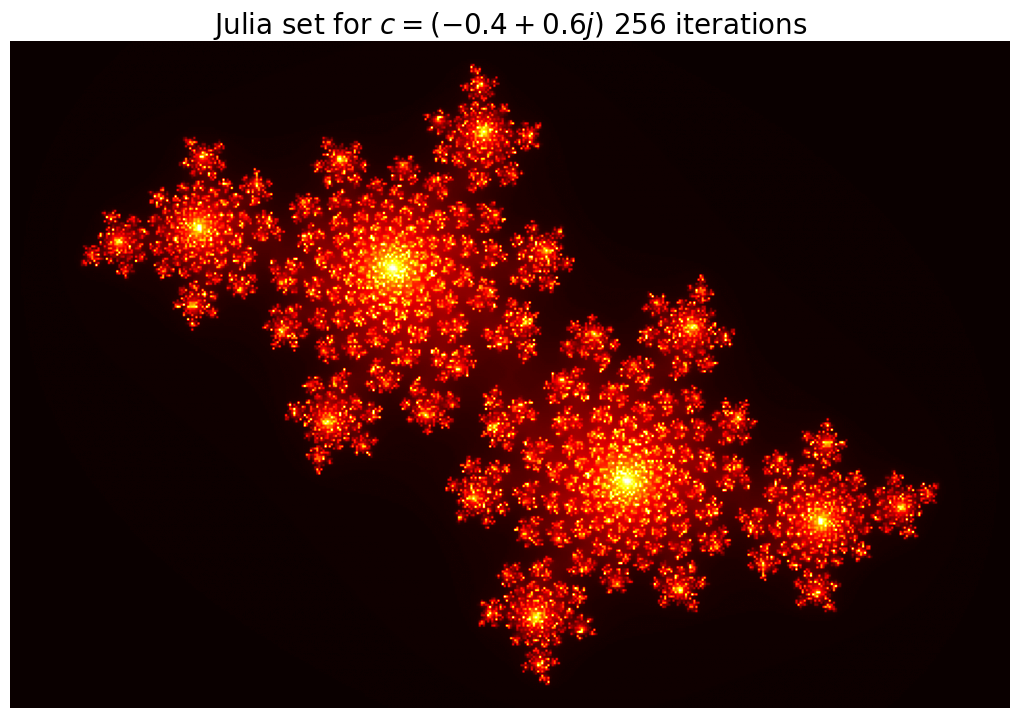

In [25]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1)
ax.set_xticks([])
ax.set_yticks([])

T = iterate_julia_set(Z, c, num_iter)

# uncomment the plot once you think your implementation of iterate_julia_set() is working
plt.imshow(np.flipud(T), cmap='hot');
title = r'Julia set for $c = %s$ %d iterations' % (c, num_iter)
plt.title(title, fontsize=20);



## Problem 4: Pandas
----

There is a file in your repository assignments directory, under the data subdirectory,
called `assg-01-data.csv` formatted using comma separated values.  This file
contains 15 lines of sales data.  Read the data into a `Pandas` data frame simply named `d`, and display the 
first 5 lines of data using the `head()`
member function.  Display the last 5 lines of the data using the `tail()` member function.

In [26]:
# notice that all data will be in a data subdirectory, one leve up from the directory where notebooks
# or code is run from
data = pd.read_csv('../data/assg-01-data.csv')

In [27]:
# display first 5 elements of the dataframe
data.head()

,account,name,street,city,state,postal-code,Jan,Feb,Mar
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752.0,10000,62000,35000
1,320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah,NorthCarolina,38365.0,95000,45000,35000
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,NaN,91000,120000,35000
3,109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021.0,45000,120000,10000
4,121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681.0,162000,120000,35000


In [28]:
# display the last 5 elements of the dataframe
data.tail()

,account,name,street,city,state,postal-code,Jan,Feb,Mar
10,214098,"Goodwin, Homenick and Jerde",649 Cierra Forks Apt. 078,Rosaberg,Tenessee,47743.0,45000,120000,55000
11,231907,Hahn-Moore,18115 Olivine Throughway,Norbertomouth,NorthDakota,31415.0,150000,10000,162000
12,242368,"Frami, Anderson and Donnelly",NaN,East Davian,Iowa,72686.0,162000,120000,35000
13,268755,Walsh-Haley,2624 Beatty Parkways,Goodwinmouth,NaN,31919.0,55000,120000,35000
14,273274,McDermott PLC,8917 Bergstrom Meadow,Kathryneborough,Delaware,27933.0,150000,120000,70000


As you should be able to see, the data consists of some customer sales' information, along with the customer address.  
The data contains sales information for 3 months.

In the next cell, create a new column in your `Pandas` data frame named `total`.  This column should contain the total
sales for each row for the 3 months of data present.

In [29]:
# create a new column total and show it
data['Total'] = data['Jan'] + data['Feb'] + data['Mar']
data

,account,name,street,city,state,postal-code,Jan,Feb,Mar,Total
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752.0,10000,62000,35000,107000
1,320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah,NorthCarolina,38365.0,95000,45000,35000,175000
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,NaN,91000,120000,35000,246000
3,109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021.0,45000,120000,10000,175000
4,121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681.0,162000,120000,35000,317000
5,132971,"Williamson, Schumm and Hettinger",89403 Casimer Spring,Jeremieburgh,Arkansas,62785.0,150000,120000,35000,305000
6,145068,Casper LLC,340 Consuela Bridge Apt. 400,Lake Gabriellaton,Mississipi,18008.0,62000,120000,70000,252000
7,205217,Kovacek-Johnston,91971 Cronin Vista Suite 601,Deronville,RhodeIsland,53461.0,145000,95000,35000,275000
8,209744,Champlin-Morar,26739 Grant Lock,Lake Juliannton,Pennsylvania,64415.0,70000,95000,35000,200000
9,212303,Gerhold-Maggio,366 Maggio Grove Apt. 998,North Ras,NaN,46308.0,70000,120000,35000,225000


Using pandas data frame operations only, find out the following information:

- The total sum of sales in the month of Jan
- The minimum sales amount in the month of Feb
- The average (mean) sales for the month of Mar
- Change the name of the column from `postal-code` to `zipcode`.  Having a - in the name makes it
unusable as an attribute name, so we might want to fix this.
- Count the total number of missing items in the state and zipcode attributes

In [30]:
# total sum of sales in the month of Jan
print(data['Jan'].sum())

1462000


In [31]:
# minum sales amount in the month of Feb
print(data['Feb'].min())

10000


In [32]:
# average sales for the month of Mar
print(data['Mar'].mean())

47800.0


In [33]:
# change the name of the column to zipcode
data.rename({'postal-code': 'zipcode'}, axis=1, inplace=True)
data

,account,name,street,city,state,zipcode,Jan,Feb,Mar,Total
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752.0,10000,62000,35000,107000
1,320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah,NorthCarolina,38365.0,95000,45000,35000,175000
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,NaN,91000,120000,35000,246000
3,109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021.0,45000,120000,10000,175000
4,121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681.0,162000,120000,35000,317000
5,132971,"Williamson, Schumm and Hettinger",89403 Casimer Spring,Jeremieburgh,Arkansas,62785.0,150000,120000,35000,305000
6,145068,Casper LLC,340 Consuela Bridge Apt. 400,Lake Gabriellaton,Mississipi,18008.0,62000,120000,70000,252000
7,205217,Kovacek-Johnston,91971 Cronin Vista Suite 601,Deronville,RhodeIsland,53461.0,145000,95000,35000,275000
8,209744,Champlin-Morar,26739 Grant Lock,Lake Juliannton,Pennsylvania,64415.0,70000,95000,35000,200000
9,212303,Gerhold-Maggio,366 Maggio Grove Apt. 998,North Ras,NaN,46308.0,70000,120000,35000,225000


In [34]:
# number of missing items in state
data.state.value_counts(dropna=False)

state
Iowa             2
NaN              2
Texas            1
NorthCarolina    1
Maine            1
California       1
Arkansas         1
Mississipi       1
RhodeIsland      1
Pennsylvania     1
Tenessee         1
NorthDakota      1
Delaware         1
Name: count, dtype: int64

In [35]:
# number of missing items in zipcode
data.zipcode.value_counts(dropna=False)

zipcode
28752.0    1
38365.0    1
NaN        1
46021.0    1
49681.0    1
62785.0    1
18008.0    1
53461.0    1
64415.0    1
46308.0    1
47743.0    1
31415.0    1
72686.0    1
31919.0    1
27933.0    1
Name: count, dtype: int64

Finally plot the Jan, Feb, Mar and total sales data as bar plots using the `plot()` convenience function
available from a Pandas `DataFrame`.

Label your x an y axis on your plot.  Also change the x tick labels to be the account numbers instead
of 0,1,2,...14.  Also give the plot an appropriate title.  You will need to use matplotlib 
functions after you create your bar chart to add the labels and change the tic marks.

Text(0.5, 1.0, 'Monthly and Total Sales by Account Number')

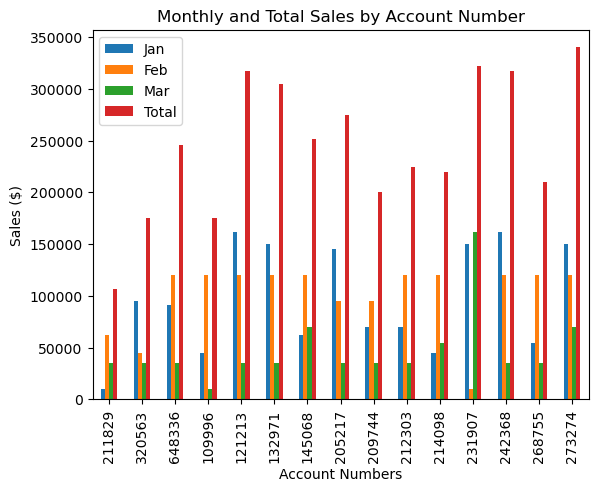

In [36]:
# create described plot here
data.loc[:,'Jan':'Total'].plot.bar()
plt.rcParams['figure.figsize'] = (10, 8)
plt.xticks(data.index, data.account)
plt.xlabel('Account Numbers')
plt.ylabel('Sales ($)')
plt.title('Monthly and Total Sales by Account Number')


**Extra Credit**: Perhaps we would like to have our visualization sorted
by the total sales.  Replot the bar plot but sort the account numbers by their
total sales, so we can more easily see the accounts from the lowest sales to our
highest sales.

Text(0.5, 1.0, 'Monthly and Total Sales by Account Number')

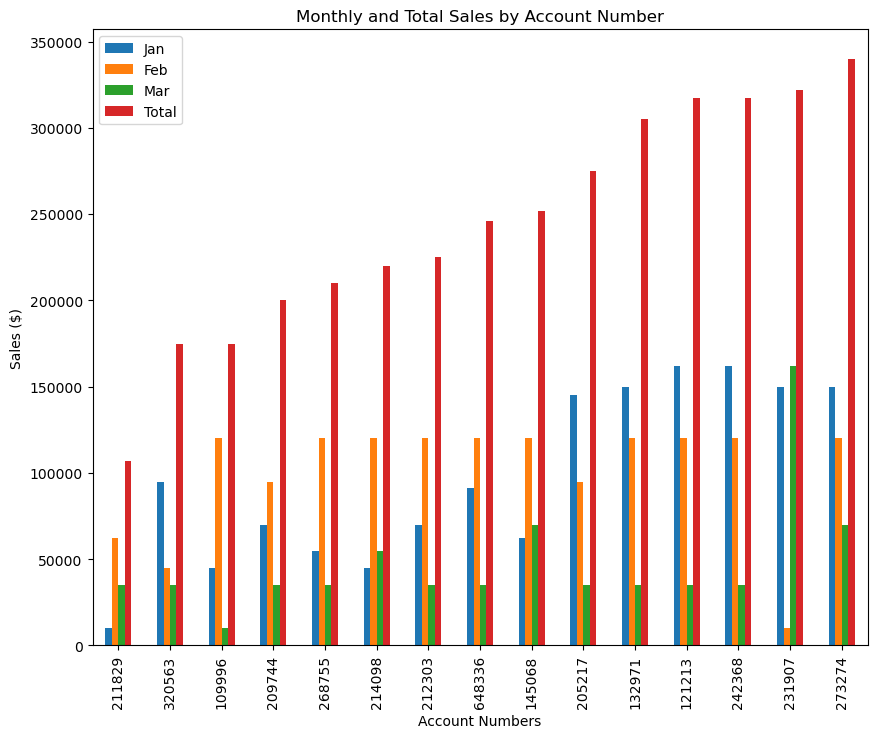

In [45]:
# plot again but with the sorted data
data2 = data.sort_values(by='Total')
data2.loc[:,'Jan':'Total'].plot.bar()
plt.rcParams['figure.figsize'] = (10, 8)
plt.xticks(range(15), data2.account)
plt.xlabel('Account Numbers')
plt.ylabel('Sales ($)')
plt.title('Monthly and Total Sales by Account Number')